[Reference](https://romainlhardy.medium.com/estimating-feature-importance-the-easy-way-2ebe970c600c)

In [2]:
# Imports
import numpy as np
import sklearn
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load the data
iris = load_iris()
X = iris.data
y = iris.target

# Create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Preprocess the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Create a classifier
clf = MLPClassifier(hidden_layer_sizes=(8, 4),learning_rate_init=0.01)

# Fit the classifier using the training set
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Evaluate the classifier using the test set
acc = accuracy_score(y_test, y_pred)
print(acc)

0.9333333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [7]:
def get_feature_importance(j, n):
  s = accuracy_score(y_test, y_pred) # baseline score
  total = 0.0
  for i in range(n):
    perm = np.random.permutation(range(X_test.shape[0]))
    X_test_ = X_test.copy()
    X_test_[:, j] = X_test[perm, j]
    y_pred_ = clf.predict(X_test_)
    s_ij = accuracy_score(y_test, y_pred_)
    total += s_ij
  return s - total / n

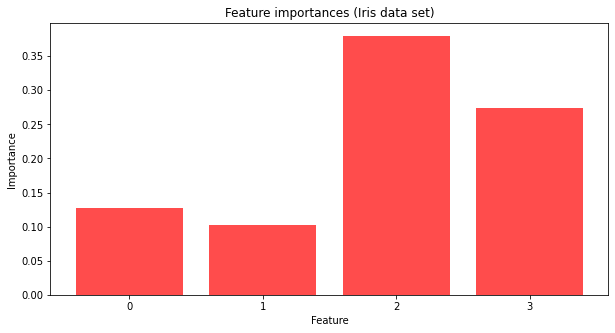

In [9]:
import matplotlib.pyplot as plt
# Feature importances
f = []
for j in range(X_test.shape[1]):
  f_j = get_feature_importance(j, 100)
  f.append(f_j)# Plot
plt.figure(figsize=(10, 5))
plt.bar(range(X_test.shape[1]), f, color="r", alpha=0.7)
plt.xticks(ticks=range(X_test.shape[1]))
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature importances (Iris data set)")
plt.show()